In [242]:
import pandas as pd
data = pd.read_stata('https://people.ucsc.edu/~aspearot/Econ_217/org_example.dta')

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_activity = 'all'

In [6]:
import numpy as np

# problem 1

In [7]:
data1 = data[data.nilf==0.0]
data1 = data1.groupby('educ').unem.agg(['count','sum'])
data1['um_ratio'] = data1['sum']/data1['count']

In [8]:
from plotnine import *

In [9]:
data1['educ'] = data1.index

/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


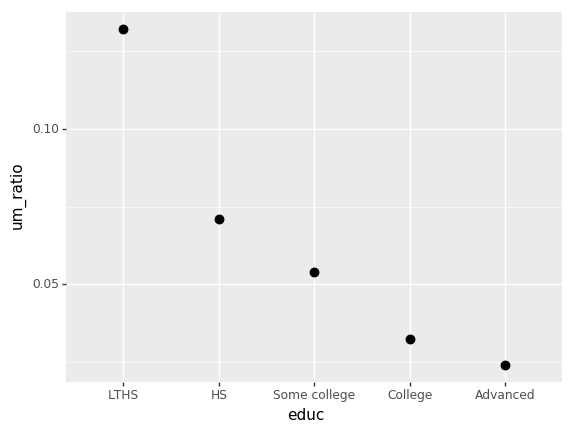

<ggplot: (7526683982)>

In [10]:
(ggplot(data1)
+ aes('educ','um_ratio')
+ geom_point(size=3)
)

The higher education level, the lower the unemployment rate.

# problem 2

/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


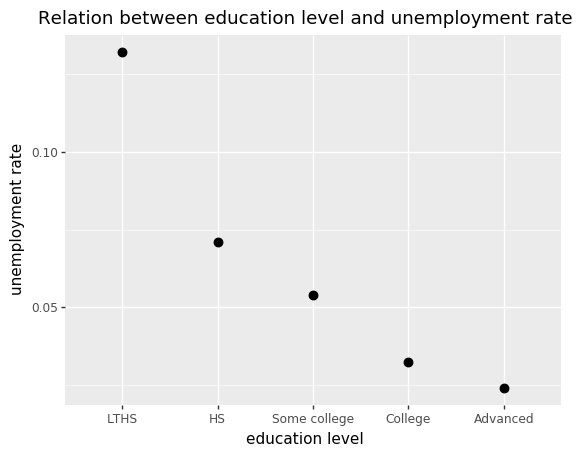

<ggplot: (7526786936)>

In [41]:
(ggplot(data1)
+ aes('educ','um_ratio')
+ geom_point(size=3)
+ labs(x='education level', y='unemployment rate', title='Relation between education level and unemployment rate'))


# problem 3

In [17]:
data.head()

,year,month,minsamp,hrlonglk,age,female,wbho,educ,married,ownchild,...,hourslw,union,ind_2d,ind12,docc03,occ03,paidhre,earnhre,w_nber,rw
0,2013,1,4,Continuing,58,1,White,College,1,0.0,...,20.0,NaN,"Health care services, except hospitals 7970-81...",7970.0,Office and administrative support occupations ...,NaN,NaN,-0.01,NaN,NaN
1,2013,1,4,Continuing,59,0,White,Advanced,1,0.0,...,56.0,NaN,"Health care services, except hospitals 7970-81...",7970.0,Healthcare practitioner and technical occupati...,NaN,NaN,-0.01,NaN,NaN
2,2013,1,4,New or Replacement,35,0,White,Advanced,0,0.0,...,70.0,0.0,Hospitals 8190,8190.0,Healthcare practitioner and technical occupati...,NaN,0.0,-0.01,NaN,57.485714
3,2013,1,4,Continuing,58,1,White,Some college,0,0.0,...,40.0,0.0,"Telecommunications 6680,6690",6680.0,Management occupations 0010-0430,NaN,0.0,-0.01,NaN,40.865250
4,2013,1,4,Continuing,54,0,White,College,1,0.0,...,40.0,0.0,Paper and printing 1870-1990,1990.0,Management occupations 0010-0430,NaN,0.0,-0.01,NaN,37.500000


In [66]:
data3 = data.groupby(['year','educ']).mean().rw
data3 = data3.reset_index()


/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


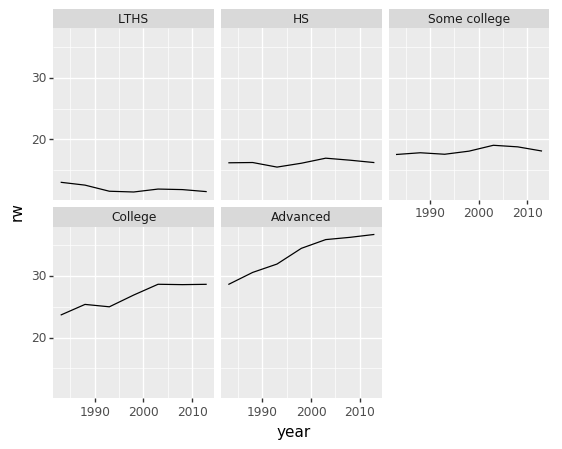

<ggplot: (-9223372029323512625)>

In [69]:
(ggplot(data3, aes(x='year',y='rw'))
+geom_line()
+facet_wrap('~educ'))

# problem 4

In [241]:
data4 = data.groupby(['female','docc03'],as_index=False).mean()
data4 = data4.sort_values(by=['rw'])
data4 = data4[['female','docc03','rw']]
data4.head()

,female,docc03,rw
35,1,Food preparation and serving related occupatio...,9.485077
12,0,Food preparation and serving related occupatio...,11.158471
40,1,"Farming, fishing, and forestry occupations 600...",11.297237
36,1,Building and grounds cleaning and maintenance ...,11.576858
37,1,Personal care and service occupations 4300-4650,12.284021


In [281]:
data4 = data[data['rw'].isnull() == False]
least = data4.docc03.value_counts().sort_values().index[1]
most = data4.docc03.value_counts().sort_values().index[-1]
data4 = data4.groupby(['female','docc03'],as_index=False).mean()
data4 = data4[['female','docc03','rw']]
data4 = data4[(data4['docc03'] == most)|(data4['docc03'] == least)]
data4.head(100)

,female,docc03,rw
16,0,Office and administrative support occupations ...,17.909870
17,0,"Farming, fishing, and forestry occupations 600...",12.337955
39,1,Office and administrative support occupations ...,16.687391
40,1,"Farming, fishing, and forestry occupations 600...",11.297237


/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


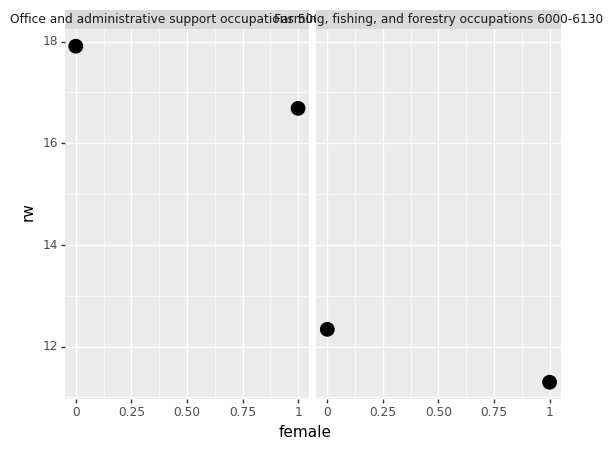

<ggplot: (-9223372029297571079)>

In [287]:
(ggplot(data4)
+ aes(x='female',y='rw')
+ geom_point(size=5)
+ facet_wrap('~docc03'))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# problem 5

/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/xianglongtan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


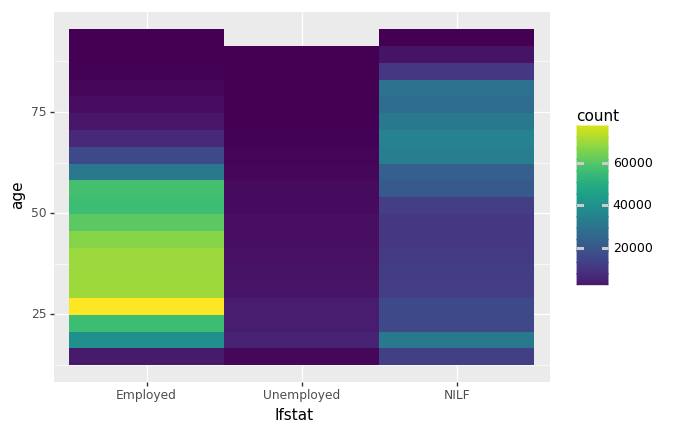

<ggplot: (7528728573)>

In [132]:
(ggplot(data)
+aes('lfstat','age')
+geom_bin2d(bins=20))

# Conclusion
People whose age between 20 and 60 are mostly employed and whose age below 20 and above 60 are mostly not in labar force